In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(704, 1279, 3)


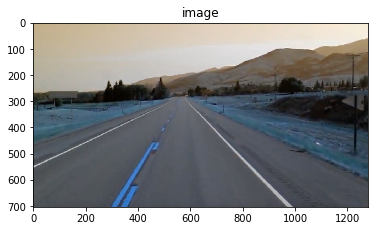

In [13]:
image=cv2.imread("test_image.jpg")
print(image.shape)
plt.title("image")
plt.imshow(image)
plt.show()

In [14]:
lane_image=np.copy(image)
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny_image=cv2.Canny(blur,50,150)
    return canny_image

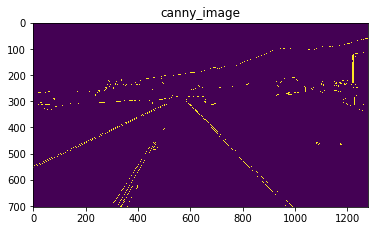

In [15]:
canny_image=canny(lane_image)
plt.title("canny_image")
plt.imshow(canny_image)
plt.show()

In [16]:
def region_of_interest(image):
    height=image.shape[0]
    width=image.shape[1]
    polygons=np.array([
    [(0,height),(1100,height),(550,250)]
    ])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask) 
    return masked_image

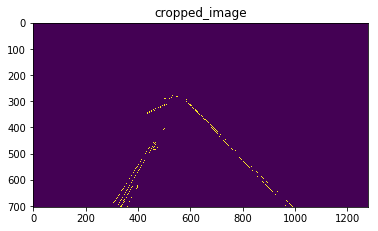

In [17]:
cropped_image=region_of_interest(canny_image)
plt.title("cropped_image")
plt.imshow(cropped_image)
plt.show()

In [33]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
    return line_image

In [34]:
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,120,np.array([]),minLineLength=40,maxLineGap=5)
#print(lines)
line_image=display_lines(lane_image,lines)

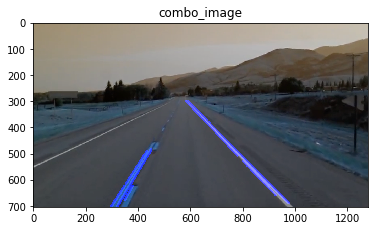

In [35]:
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.title("combo_image")
plt.imshow(combo_image)
plt.show()

In [36]:
def make_coordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*0.6)
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [37]:
def display_average_line(image,lines):
    left_lane=[]
    right_lane=[]
    if lines is None:
        return
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        slope=parameters[0]
        intercept=parameters[1]
        if slope>0:
            right_lane.append((slope,intercept))
        else :
            left_lane.append((slope,intercept))
            
    left_line_average=np.average(left_lane,axis=0)
    right_line_average=np.average(right_lane,axis=0)
    left_line=make_coordinates(image,left_line_average)
    right_line=make_coordinates(image,right_line_average)
    return np.array([left_line,right_line])

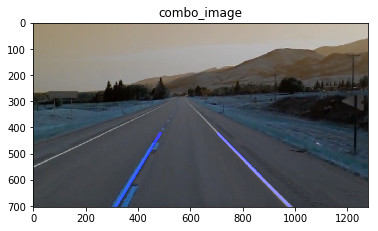

In [38]:
avg_line=display_average_line(lane_image,lines)
line_image=display_lines(lane_image,avg_line)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.title("combo_image")
plt.imshow(combo_image)
plt.show()

In [39]:
cap=cv2.VideoCapture("test2.mp4")
while(cap.isOpened):
    _,frame=cap.read()
    canny_frame=canny(frame)
    cropped_frame=region_of_interest(canny_frame)
    lines=cv2.HoughLinesP(cropped_frame,2,np.pi/180,120,np.array([]),minLineLength=40,maxLineGap=5)
    avg_line=display_average_line(frame,lines)
    line_frame=display_lines(frame,avg_line)
    combo_frame=cv2.addWeighted(frame,0.8,line_frame,1,1)
    cv2.imshow("result",combo_frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()